In [1]:
from torch.utils.data import Dataset
import json
import numpy as np
import torch
import time
from tqdm import tqdm
from NN_Models import *

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the train data and test data

In [2]:
X_train = torch.load('data/X_sentence_train.pt')
y_train = torch.load('data/y_train.pt')

X_test = torch.load('data/X_sentence_test.pt')
y_test = torch.load('data/y_test.pt')

In [4]:
num_samples, num_features = X_train.shape

print(X_train.shape)
print(X_test.shape)

torch.Size([6268, 256])
torch.Size([3086, 256])


## Get dataloader for Pytorch training

In [5]:
# train data loader
train_dataset, train_dataloader = BinaryDataLoader(X_train, y_train, shuffle=True, batch_size=100)

## Training Part

NeuralNetworkYearVenue(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=100, bias=True)
)


100%|██████████| 100/100 [00:16<00:00,  6.12it/s]


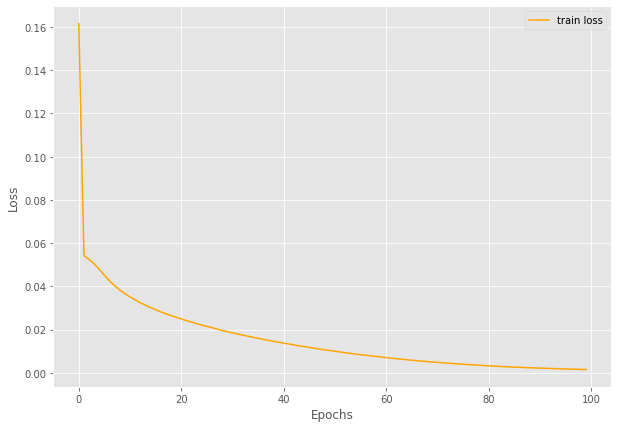

In [17]:
import torch.optim as optim

model = Model()
model.set_dim(num_features)
model.year_venue_model()
print(model.model)

learning_rate = 0.001
optimizer = optim.Adam(params=model.year_venue_model().parameters(), lr=learning_rate) # 学习率衰减 / 学习率震荡
epochs = 100
model.train(train_dataloader, optimizer, epochs)
model.save_status("abstract_title")
model.plot_loss()

### Test (ignore when submit kaggle)

In [19]:
from evaluation import evaluation

# print some info
print(f"[INFO]: Number of testing samples: {X_test.shape[0]}")
print(f"[INFO]: Number of testing features: {X_test.shape[1]}")

thresholds = np.linspace(0, 1, 11)
logits = model.predict(X_test)
f1_scores = evaluation(logits, y_test, thresholds)

[INFO]: Number of testing samples: 3086
[INFO]: Number of testing features: 256


100%|██████████| 11/11 [00:42<00:00,  3.90s/it]


In [20]:
print(thresholds[f1_scores.index(max(f1_scores))])
print(max(f1_scores))

0.9
0.22245625405055086


- 0.2
- 0.3264120187254715

In [22]:
from preprocessing import for_kaggle
from evaluation import kaggle_predict

kaggle_predict(model, X_test, 'abstract_title_test', lstm=True)

# Kaggle Predictions

100%|██████████| 100/100 [00:17<00:00,  5.82it/s]


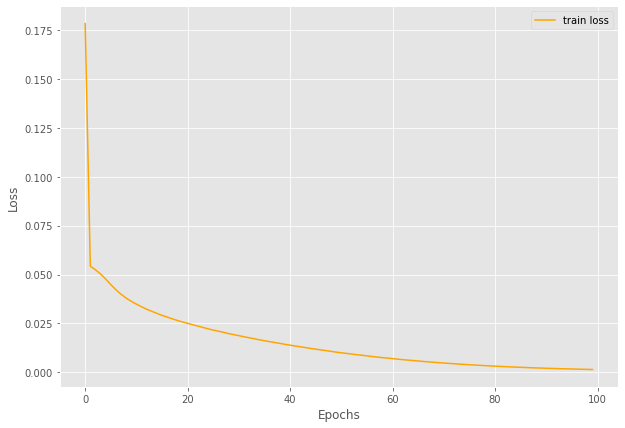

In [24]:
X = torch.concat((X_train, X_test), axis=0)
y = torch.concat((y_train, y_test), axis=0)

train_dataset, train_dataloader = BinaryDataLoader(X_train, y_train, shuffle=True, batch_size=100)

model = Model()
model.set_dim(num_features)
model.year_venue_model()

learning_rate = 0.001
optimizer = optim.Adam(params=model.year_venue_model().parameters(), lr=learning_rate) # 学习率衰减 / 学习率震荡
epochs = 100
model.train(train_dataloader, optimizer, epochs)
model.save_status("abstract_title")
model.plot_loss()

In [26]:
from preprocessing import for_kaggle
from evaluation import kaggle_predict

X_kaggle = for_kaggle('word')

kaggle_predict(model, X_kaggle, 'abstract_title_doc2vec', lstm=True)

title & abstract: 100%|██████████| 800/800 [00:22<00:00, 35.78it/s]
